In [10]:
import pandas as pd
import numpy as np
from scipy import stats
from graphviz import Digraph
from matplotlib import mlab
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定

In [2]:
wunc = pd.read_csv("wunc.csv")
wunc = wunc.rename(columns={'tweet_count': 'elite_response'})

In [3]:
wunc.columns

Index(['created_at', 'unity', 'numbers', 'commitment', 'elite_response', 'ei'], dtype='object')

In [4]:
number = wunc['numbers'] 
normalized_number = scipy.stats.zscore(number)
normalized_number

0    -0.497765
1    -0.597332
2    -0.311077
3     0.067019
4    -0.530811
5    -0.825219
6    -0.415794
7     0.199632
8    -0.497765
9    -0.629519
10   -0.332965
11   -0.456565
12   -0.182756
13   -1.071991
14   -1.282282
15   -0.974570
16   -0.770286
17   -1.126066
18   -0.955257
19   -0.166019
20    1.969947
21    2.495248
22    1.512025
23    2.109855
24    1.251521
25    1.313750
26   -0.220523
27   -0.632952
28    0.855400
29    0.429666
30    0.273449
Name: numbers, dtype: float64

In [7]:
unity = wunc['unity'] 
normalized_unity = scipy.stats.zscore(unity)

commitment = wunc['commitment'] 
commitment = commitment.fillna(commitment.mean())
normalized_commitment = scipy.stats.zscore(commitment)

number = wunc['numbers'] 
normalized_number = scipy.stats.zscore(number)

ei = wunc['ei'] 
normalized_ei = scipy.stats.zscore(ei)

elite_response = wunc['elite_response'] 
normalized_elite_response = scipy.stats.zscore(elite_response)

In [18]:
wunc['elite_response']

0       3
1       5
2       6
3       5
4       2
5       2
6       4
7       5
8      11
9       5
10     10
11      5
12      2
13      1
14      0
15      2
16      2
17      1
18      6
19      4
20    128
21     81
22     49
23     39
24     19
25     23
26      7
27      1
28     18
29     36
30     24
Name: elite_response, dtype: int64

In [8]:
cols = ['elite_response', 'ei', 'unity', 'number','commitment']
df = pd.DataFrame(list(zip(normalized_elite_response, normalized_ei, normalized_unity, normalized_number, normalized_commitment)), columns=cols)

<AxesSubplot:ylabel='elite_response'>

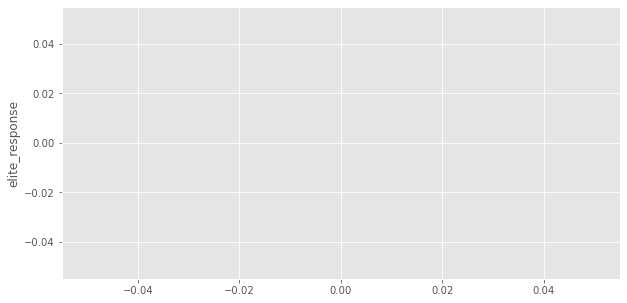

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data = df, y = 'elite_response')

In [15]:
df

,elite_response,ei,unity,number,commitment
0,-0.497566,0.045961,-0.033728,-0.497765,-0.080740
1,-0.422871,-0.267975,0.583724,-0.597332,0.248215
2,-0.385523,0.158656,0.773159,-0.311077,-0.422545
3,-0.422871,-0.147231,0.322953,0.067019,-0.595140
4,-0.534913,-0.734855,-0.356536,-0.530811,0.284287
5,-0.534913,-1.161486,0.435171,-0.825219,0.205645
6,-0.460218,-0.364571,-0.649093,-0.415794,0.226885
7,-0.422871,0.231103,-0.523163,0.199632,-0.482181
8,-0.198785,-0.630210,0.283608,-0.497765,-0.039654
9,-0.422871,-1.056841,-0.353639,-0.629519,0.038714


<AxesSubplot:>

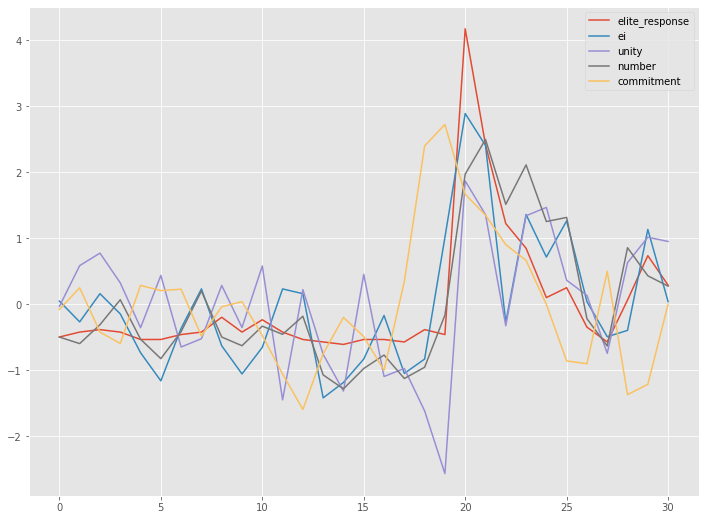

In [16]:
df.plot()

In [96]:
df_std = stats.zscore(df)
df_std

,elite_response,ei,unity,number,commitment
0,-0.497566,0.045961,-0.033728,-0.497765,-8.074041e-02
1,-0.422871,-0.267975,0.583724,-0.597332,2.482150e-01
2,-0.385523,0.158656,0.773159,-0.311077,-4.225445e-01
3,-0.422871,-0.147231,0.322953,0.067019,-5.951401e-01
4,-0.534913,-0.734855,-0.356536,-0.530811,2.842868e-01
5,-0.534913,-1.161486,0.435171,-0.825219,2.056454e-01
6,-0.460218,-0.364571,-0.649093,-0.415794,2.268852e-01
7,-0.422871,0.231103,-0.523163,0.199632,-4.821805e-01
8,-0.198785,-0.630210,0.283608,-0.497765,-3.965382e-02
9,-0.422871,-1.056841,-0.353639,-0.629519,3.871378e-02


In [98]:
# 'elite_response', 'ei', 'unity', 'number','commitment'

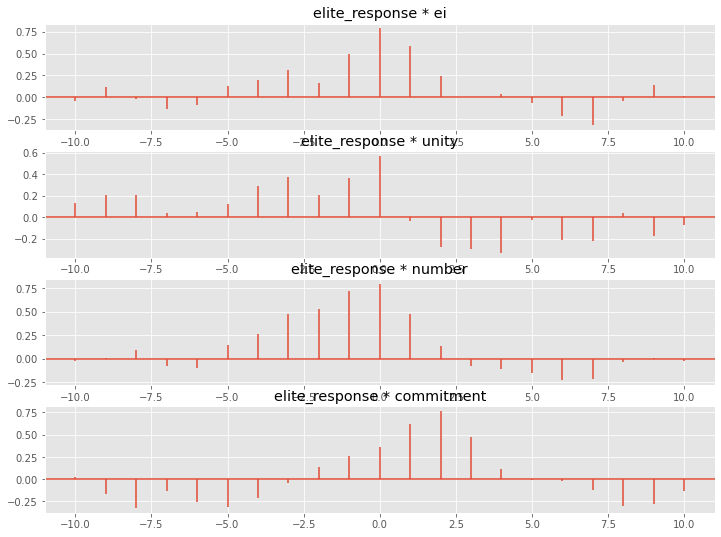

In [102]:
fig, ax = plt.subplots(4,1)
# Elite response と EI の相互相関
ax[0].xcorr(df_std.iloc[:,0], df_std.iloc[:,1])
ax[0].title.set_text(str(df_std.columns[0]+' * '+df_std.columns[1]))

# Elite response と Unity の相互相関
ax[1].xcorr(df_std.iloc[:,0], df_std.iloc[:,2])
ax[1].title.set_text(str(df_std.columns[0]+' * '+df_std.columns[2]))

# Elite response と Number の相互相関
ax[2].xcorr(df_std.iloc[:,0], df_std.iloc[:,3])
ax[2].title.set_text(str(df_std.columns[0]+' * '+df_std.columns[3]))

# Elite response と Commitment の相互相関
ax[3].xcorr(df_std.iloc[:,0], df_std.iloc[:,4])
ax[3].title.set_text(str(df_std.columns[0]+' * '+df_std.columns[4]))


In [87]:
#Elite response とCommitmentのラグ2の相関が最大、つまりElite responsと2日前のCommitmentの相関が最大になっています。

#2つの変量を持つ時系列データで、系列Aよりも系列Bが少し遅れて変化するような関係がある場合、系列Aは系列Bの先行指標であるといいます。

#グレンジャー因果性の考え方からすると、Commitment→Elite responseと考えられます。

In [ ]:
# 'elite_response', 'ei', 'unity', 'number','commitment'

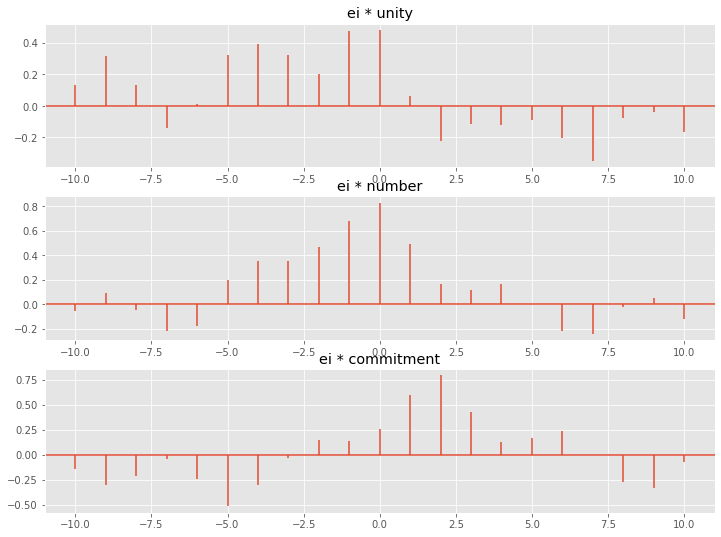

In [103]:
fig, ax = plt.subplots(3,1)
# EI と unity の相互相関
ax[0].xcorr(df_std.iloc[:,1], df_std.iloc[:,2])
ax[0].title.set_text(str(df_std.columns[1]+' * '+df_std.columns[2]))

# EI と Number の相互相関
ax[1].xcorr(df_std.iloc[:,1], df_std.iloc[:,3])
ax[1].title.set_text(str(df_std.columns[1]+' * '+df_std.columns[3]))

# EI と Commitment の相互相関
ax[2].xcorr(df_std.iloc[:,1], df_std.iloc[:,4])
ax[2].title.set_text(str(df_std.columns[1]+' * '+df_std.columns[4]))


In [ ]:
#EI とCommitmentのラグ2の相関が最大、つまりEIと2日前のCommitmentの相関が最大になっています。

#2つの変量を持つ時系列データで、系列Aよりも系列Bが少し遅れて変化するような関係がある場合、系列Aは系列Bの先行指標であるといいます。

#グレンジャー因果性の考え方からすると、Commitment→EIと考えられます。

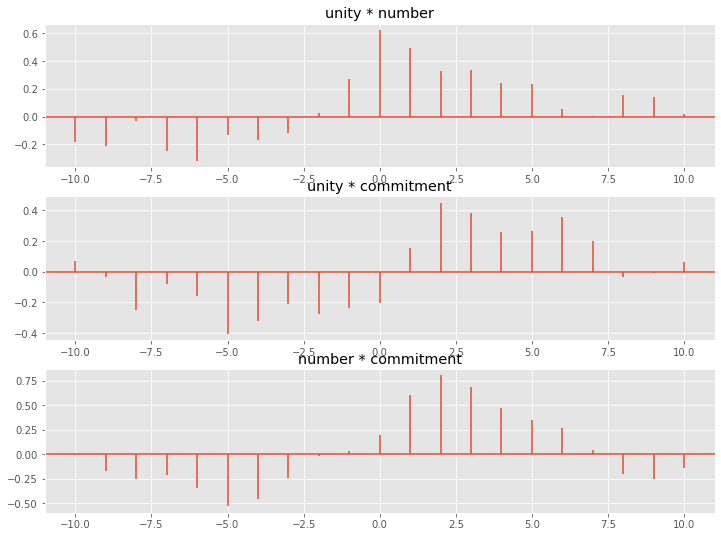

In [104]:
fig, ax = plt.subplots(3,1)
# Unity と Number の相互相関
ax[0].xcorr(df_std.iloc[:,2], df_std.iloc[:,3])
ax[0].title.set_text(str(df_std.columns[2]+' * '+df_std.columns[3]))

# Unity と Commitment の相互相関
ax[1].xcorr(df_std.iloc[:,2], df_std.iloc[:,4])
ax[1].title.set_text(str(df_std.columns[2]+' * '+df_std.columns[4]))

# Commitment と　Number の相互相関
ax[2].xcorr(df_std.iloc[:,3], df_std.iloc[:,4])
ax[2].title.set_text(str(df_std.columns[3]+' * '+df_std.columns[4]))


In [ ]:
#Unity とCommitmentのラグ2の相関が最大、つまりEIと2日前のCommitmentの相関が最大になっています。

#2つの変量を持つ時系列データで、系列Aよりも系列Bが少し遅れて変化するような関係がある場合、系列Aは系列Bの先行指標であるといいます。

#グレンジャー因果性の考え方からすると、Commitment→Unityと考えられます。

#Number とCommitmentのラグ2の相関が最大、つまりEIと2日前のCommitmentの相関が最大になっています。

#2つの変量を持つ時系列データで、系列Aよりも系列Bが少し遅れて変化するような関係がある場合、系列Aは系列Bの先行指標であるといいます。

#グレンジャー因果性の考え方からすると、Commitment→Numberと考えられます。